In [71]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
import pandas as pd
import glob
import os
import pypfopt as pyp
from collections import namedtuple
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import itertools
import utils as u
import random
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
hour_data_mid_usd = pd.read_csv('hour_data_mid_usd_est.csv', index_col='time_est')
hour_data_mid_usd = hour_data_mid_usd.drop(columns="Unnamed: 0")
hour_data_mid_usd_ret = hour_data_mid_usd.pct_change().dropna()

In [9]:
hour_data_mid_usd_ret

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT,USD.AUD.SPOT,USD.GBP.SPOT,USD.NZD.SPOT,USD.MXN.SPOT,USD.NOK.SPOT,USD.SEK.SPOT,USD.TRY.SPOT
time_est,,,,,,,,,,
2022-01-02 19:00:00,-0.000954,-0.001188,0.000462,-0.000275,-0.000322,0.001192,0.000037,-0.001069,-0.001109,0.002570
2022-01-02 20:00:00,-0.000304,0.000586,-0.000655,-0.001369,0.000030,-0.001395,-0.000836,-0.001072,0.001175,0.001903
2022-01-02 21:00:00,-0.001400,-0.000555,-0.000868,-0.000475,-0.000973,-0.000841,-0.000983,-0.002292,-0.001356,-0.001081
2022-01-02 22:00:00,0.000498,0.000004,-0.000426,-0.000490,-0.000367,-0.000139,-0.000310,0.000468,0.000469,-0.001730
2022-01-02 23:00:00,-0.000683,0.000056,0.000146,0.000097,-0.000081,-0.000059,-0.000366,-0.000623,-0.000673,0.001106
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 12:00:00,0.001337,0.000240,-0.000117,0.000869,0.001089,0.001001,0.001992,0.001653,0.002015,-0.000075
2022-06-30 13:00:00,-0.000238,0.000037,0.000583,-0.000181,0.000021,-0.000400,0.000523,-0.000166,-0.000168,-0.001017
2022-06-30 14:00:00,0.000048,0.000738,-0.000427,-0.000506,0.000431,-0.000240,-0.002981,-0.001018,-0.001072,0.000359


In [10]:
curr_3 = hour_data_mid_usd_ret[['USD.EUR.SPOT', 'USD.JPY.SPOT', 'USD.CAD.SPOT']]

In [92]:
curr_3

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT
time_est,,,
2022-01-02 19:00:00,-0.000954,-0.001188,0.000462
2022-01-02 20:00:00,-0.000304,0.000586,-0.000655
2022-01-02 21:00:00,-0.001400,-0.000555,-0.000868
2022-01-02 22:00:00,0.000498,0.000004,-0.000426
2022-01-02 23:00:00,-0.000683,0.000056,0.000146
...,...,...,...
2022-06-30 12:00:00,0.001337,0.000240,-0.000117
2022-06-30 13:00:00,-0.000238,0.000037,0.000583
2022-06-30 14:00:00,0.000048,0.000738,-0.000427


In [151]:
min_std_oracle_3 = curr_3.apply(lambda x: min(x, key=abs), axis=1)
min_std_oracle_3.std()*(23*252)**(1/2)

0.038951136374622504

Text(0.5, 1.0, 'Rolling Volatility of Past Month - 3 Currencies')

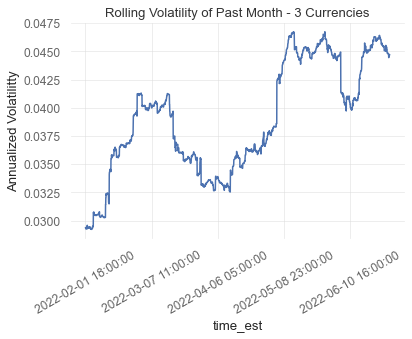

In [187]:
min_std_oracle_3_roll = (min_std_oracle_3.rolling(23*21).std()*(252*23)**(1/2)).dropna()
min_std_oracle_3_roll.plot()
plt.xticks(rotation=30)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Volatility of Past Month - 3 Currencies')

Text(0.5, 1.0, 'Rolling Volatility of Past Day - 3 Currencies')

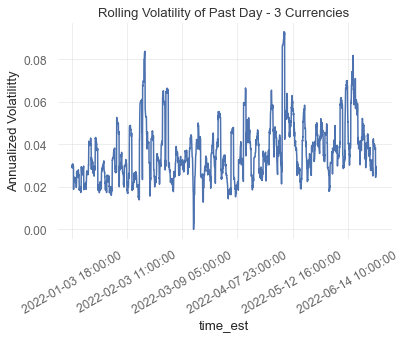

In [189]:
min_std_oracle_3_roll = (min_std_oracle_3.rolling(23).std()*(23*252)**(1/2)).dropna()
min_std_oracle_3_roll.plot()
plt.xticks(rotation=30)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Volatility of Past Day - 3 Currencies')

In [155]:
min_std_oracle_3_roll.idxmax()

'2022-05-05 07:00:00'

In [156]:
min_std_oracle_full= hour_data_mid_usd_ret.apply(lambda x: min(x, key=abs), axis=1)
min_std_oracle_full.std()*(23*252)**(1/2)

0.019667036797306685

Text(0.5, 1.0, 'Rolling Daily Volatility of Oracle - All Currencies')

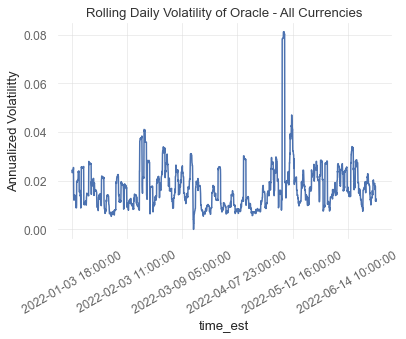

In [188]:
min_std_oracle_full_roll = (min_std_oracle_full.rolling(23).std() * (23 * 252) ** (1 / 2)).dropna()
min_std_oracle_full_roll.plot()
plt.xticks(rotation=30)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Daily Volatility of Oracle - All Currencies')

Text(0.5, 1.0, 'Rolling Monthly Volatility of Oracle - All Currencies')

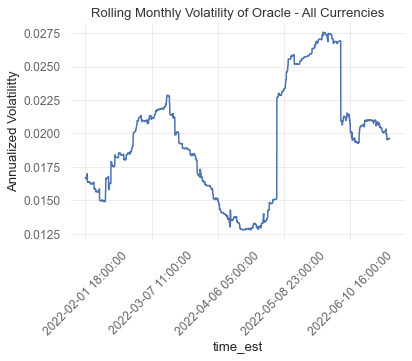

In [158]:
min_std_oracle_full_roll = (min_std_oracle_full.rolling(23*21).std() * (23 * 252) ** (1 / 2)).dropna()
min_std_oracle_full_roll.plot()
plt.xticks(rotation=45)
plt.ylabel('Annualized Volatilitty')
plt.title('Rolling Monthly Volatility of Oracle - All Currencies')

### Oracle RL

In [87]:
ranks = np.abs(curr_3).rank(axis=1)
ret_df =curr_3
ranks.index = pd.DatetimeIndex(ranks.index)

In [116]:
states = ranks
states_train= states[(states.index >= pd.Timestamp(2022,1,1)) & (states.index < pd.Timestamp(2022,5,1))]
states_test = states[(states.index >= pd.Timestamp(2022,5,1)) & (states.index < pd.Timestamp(2022,6,1))]

In [117]:
states

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT
time_est,,,
2022-01-02 19:00:00,2.0,3.0,1.0
2022-01-02 20:00:00,1.0,2.0,3.0
2022-01-02 21:00:00,3.0,1.0,2.0
2022-01-02 22:00:00,3.0,1.0,2.0
2022-01-02 23:00:00,3.0,1.0,2.0
...,...,...,...
2022-06-30 12:00:00,3.0,2.0,1.0
2022-06-30 13:00:00,2.0,1.0,3.0
2022-06-30 14:00:00,1.0,3.0,2.0


In [125]:
ret_df

,USD.EUR.SPOT,USD.JPY.SPOT,USD.CAD.SPOT
time_est,,,
2022-01-02 19:00:00,-0.000954,-0.001188,0.000462
2022-01-02 20:00:00,-0.000304,0.000586,-0.000655
2022-01-02 21:00:00,-0.001400,-0.000555,-0.000868
2022-01-02 22:00:00,0.000498,0.000004,-0.000426
2022-01-02 23:00:00,-0.000683,0.000056,0.000146
...,...,...,...
2022-06-30 12:00:00,0.001337,0.000240,-0.000117
2022-06-30 13:00:00,-0.000238,0.000037,0.000583
2022-06-30 14:00:00,0.000048,0.000738,-0.000427


In [66]:
ranks_list = list(itertools.permutations([1,2,3], 3))

In [103]:
Action = namedtuple('Action', ['weight'])
State = namedtuple('State', ['EUR_Rank','JPY_Rank','CAD_Rank'])
weightOptions = [(1,0,0),(0,1,0),(0,0,1)]
actionSpace = [Action(w) for w in weightOptions]
stateSpace = [State(r[0],r[1],r[2]) for r in ranks_list]

In [104]:
stateSpace

[State(EUR_Rank=1, JPY_Rank=2, CAD_Rank=3),
 State(EUR_Rank=1, JPY_Rank=3, CAD_Rank=2),
 State(EUR_Rank=2, JPY_Rank=1, CAD_Rank=3),
 State(EUR_Rank=2, JPY_Rank=3, CAD_Rank=1),
 State(EUR_Rank=3, JPY_Rank=1, CAD_Rank=2),
 State(EUR_Rank=3, JPY_Rank=2, CAD_Rank=1)]

In [105]:
actionSpace

[Action(weight=(1, 0, 0)), Action(weight=(0, 1, 0)), Action(weight=(0, 0, 1))]

In [55]:
def runif():
    """uniform random number generator"""
    return np.random.uniform(0, 1, 1)[0]

def index_list(L):
    """from a list, build a dictionary which list element to position"""
    return dict(zip(L, [x for x in range(0, len(L))]))

In [132]:
alpha = 0.1 ## learning rate

class TabularQLearner:
    def __init__(self, act_space, state_space, eps=0.1):
        self.actions = act_space
        self.states = state_space
        self.lookup = index_list(state_space)
        self.Q = np.zeros((len(self.states), len(self.actions)))
        self.epsilon = eps
        self.action_lookup = index_list(act_space)
        self.zero_trade = self.action_lookup[act_space[0]]

    def __greedy_action_index(self, state_index):
        """calculate the integer for indexing into self.Q or self.actions of the greedy action"""
        q = self.Q[state_index]
        if not np.any(q):
            return self.zero_trade
        else:
            return np.argmax(q)

    def greedy_action(self, state):
        """calculate the actual greedy action, not just its index"""
        return self.actions[self.__greedy_action_index(self.lookup[state])]

    def maxQ(self, state):
        return max(self.Q[self.lookup[state]])

    def train(self, states_, returns):
        for h in range(len(states_)):
            curr = State(states_.iloc[h,0],states_.iloc[h,1],states_.iloc[h,2])
            i = self.lookup[curr]

            rand = runif()
            # with probability epsilon, select action randomly from amongst all available actions with equal probability
            if rand <= self.epsilon:
                a = random.choice(self.actions)
            else:
                a = self.greedy_action(curr)
            j = self.action_lookup[a]

            # for reward calculation
            reward = -sum((list(a.weight)*np.abs(returns.iloc[h,:])))

            self.Q[i,j] = self.Q[i,j] + alpha * (reward - self.Q[i,j])

In [133]:
learner = TabularQLearner(actionSpace, stateSpace, eps=0.1)
for x in range(10):
    learner.train(states_train, ret_df)

In [134]:
qfunction = pd.DataFrame()
for s in stateSpace:
    optimal_weight = learner.greedy_action(s).weight
    qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)

C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method

In [135]:
qfunction

,EUR,JPY,CAD,optimal_weight_eur,optimal_weight_jpy,optimal_weight_cad
0,1,2,3,1,0,0
1,1,3,2,1,0,0
2,2,1,3,0,1,0
3,2,3,1,0,0,1
4,3,1,2,0,1,0
5,3,2,1,0,0,1


In [136]:
train_return = []
for h in range(len(states_train)-1):
    curr = State(states_train.iloc[h,0],states_train.iloc[h,1],states_train.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    train_return.append(sum(optimal_weight*ret_df.iloc[h,:]))

pd.DataFrame(train_return).std()*(23*252)**(1/2)

0    0.035588
dtype: float64

In [138]:
test_return = []
for h in range(len(states_test)-1):
    curr = State(states_test.iloc[h,0],states_test.iloc[h,1],states_test.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    test_return.append(sum(optimal_weight*ret_df.iloc[len(states_train)+h,:]))

pd.DataFrame(test_return).std()*(23*252)**(1/2)

0    0.045192
dtype: float64

In [159]:
weightOptions = [(1/3,1/3,1/3),(1/2,1/4,1/4),(1/4,1/2,1/4),(1/4,1/4,1/2)]
actionSpace = [Action(w) for w in weightOptions]

In [174]:
learner = TabularQLearner(actionSpace, stateSpace, eps=0.01)
for x in range(10):
    learner.train(states_train, ret_df)

In [175]:
qfunction = pd.DataFrame()
for s in stateSpace:
    optimal_weight = learner.greedy_action(s).weight
    qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)

C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\491758546.py:4: FutureWarning: The frame.append method

In [176]:
qfunction

,EUR,JPY,CAD,optimal_weight_eur,optimal_weight_jpy,optimal_weight_cad
0,1.0,2.0,3.0,0.50,0.25,0.25
1,1.0,3.0,2.0,0.50,0.25,0.25
2,2.0,1.0,3.0,0.25,0.50,0.25
3,2.0,3.0,1.0,0.25,0.25,0.50
4,3.0,1.0,2.0,0.25,0.50,0.25
5,3.0,2.0,1.0,0.25,0.25,0.50


In [177]:
train_return = []
for h in range(len(states_train)-1):
    curr = State(states_train.iloc[h,0],states_train.iloc[h,1],states_train.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    train_return.append(sum(optimal_weight*ret_df.iloc[h,:]))

pd.DataFrame(train_return).std()*(23*252)**(1/2)

0    0.047743
dtype: float64

In [178]:
test_return = []
for h in range(len(states_test)-1):
    curr = State(states_test.iloc[h,0],states_test.iloc[h,1],states_test.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    test_return.append(sum(optimal_weight*ret_df.iloc[len(states_train)+h,:]))

pd.DataFrame(test_return).std()*(23*252)**(1/2)

0    0.057209
dtype: float64

In [179]:
weightOptions = [(1/3,1/3,1/3),(1/10,1/10,8/10),(1/10,8/10,1/10),(8/10,1/10,1/10)]
actionSpace = [Action(w) for w in weightOptions]

In [180]:
learner = TabularQLearner(actionSpace, stateSpace, eps=0.01)
for x in range(10):
    learner.train(states_train, ret_df)

In [181]:
qfunction = pd.DataFrame()
for s in stateSpace:
    optimal_weight = learner.greedy_action(s).weight
    qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)

C:\Users\evank\AppData\Local\Temp\ipykernel_14220\542306952.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\542306952.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)
C:\Users\evank\AppData\Local\Temp\ipykernel_14220\542306952.py:4: FutureWarning: The frame.append method

In [182]:
qfunction    qfunction = qfunction.append({'EUR': int(s.EUR_Rank),'JPY': int(s.JPY_Rank), 'CAD' : int(s.CAD_Rank), 'optimal_weight_eur': optimal_weight[0], 'optimal_weight_jpy': optimal_weight[1], 'optimal_weight_cad': optimal_weight[2]}, ignore_index = True)


,EUR,JPY,CAD,optimal_weight_eur,optimal_weight_jpy,optimal_weight_cad
0,1.0,2.0,3.0,0.8,0.1,0.1
1,1.0,3.0,2.0,0.8,0.1,0.1
2,2.0,1.0,3.0,0.1,0.8,0.1
3,2.0,3.0,1.0,0.1,0.1,0.8
4,3.0,1.0,2.0,0.1,0.8,0.1
5,3.0,2.0,1.0,0.1,0.1,0.8


In [183]:
train_return = []
for h in range(len(states_train)-1):
    curr = State(states_train.iloc[h,0],states_train.iloc[h,1],states_train.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    train_return.append(sum(optimal_weight*ret_df.iloc[h,:]))

pd.DataFrame(train_return).std()*(23*252)**(1/2)

0    0.036829
dtype: float64

In [184]:
test_return = []
for h in range(len(states_test)-1):
    curr = State(states_test.iloc[h,0],states_test.iloc[h,1],states_test.iloc[h,2])
    optimal_weight = learner.greedy_action(curr).weight

    test_return.append(sum(optimal_weight*ret_df.iloc[len(states_train)+h,:]))

pd.DataFrame(test_return).std()*(23*252)**(1/2)

0    0.04591
dtype: float64